In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

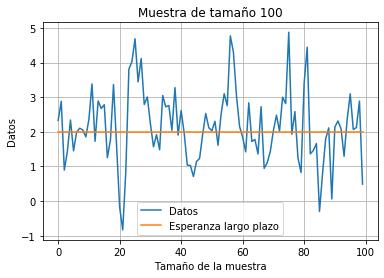

Promedio:  2.153936059679642
Esperanza al largo plazo:  2.0


In [74]:
# Parámetros
np.random.seed(10)
n = 100
phi = 0.5
c = 1
sigmaSqr = 1
mean = c / (1 - phi)
std = sigmaSqr / (1 - phi**2)
eps = np.random.normal(0, sigmaSqr, n)

# Generación de datos.
Y = np.empty(n)
Y[0] = c + eps[0]
for i in range(1, n):
    Y[i] = c + eps[i] + phi * Y[i - 1]

# Visualización de los datos.
plt.title("Muestra de tamaño "  + str(n))
plt.xlabel('Tamaño de la muestra')
plt.ylabel('Datos')
plt.plot(Y, label='Datos')
plt.plot(np.ones(n) * mean, label='Esperanza largo plazo')
plt.legend(loc='lower center')
plt.grid()
plt.show()
print("Promedio: ", np.mean(Y))
print('Esperanza al largo plazo: ', mean)

In [75]:
# Maximizar la log-verosimilitud es equivalente a minimizarla con signo menos.
def minusLogVer(theta):
    c = theta[0]
    phi = theta[1]
    sigmaSqr = theta[2]
    return (n / 2) * np.log(2 * np.pi * sigmaSqr) + (1 / (2 * sigmaSqr)) * sum((Y[i] - c - phi*Y[i - 1])**2 
                                                                               for i in range(1, n)) 
# Optimizamos poniendo la restricción sigmaSqr > 0.
cons = {'type':'ineq', 'fun': lambda theta: theta[2] - 1**(-1000)}
opti = minimize(minusLogVer, [0, 10, 1], method='SLSQP', constraints=cons)
df = pd.DataFrame()
df['Nombres'] = ['C', 'phi', 'sigmaSqr']
df['Parám. Reales'] = [c, phi, sigmaSqr] 
df['Max. velosimilitud'] = [opti.x[0], opti.x[1], opti.x[2]]
print(df)

    Nombres  Parám. Reales  Max. velosimilitud
0         C            1.0            1.220898
1       phi            0.5            0.428997
2  sigmaSqr            1.0            1.000000


[ 0.55413525 25.38540381]
